1.Data Cleaning and Preparation:

In [1]:
#Load the dataset into a DataFrame or equivalent data structure.

import pandas as pd
df = pd.read_csv('Cardiotocographic.csv')
df.head()

LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0

In [2]:
#Handle missing values appropriately (e.g., imputation, deletion).

df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [3]:
# Outlier Presents so missing values fill with Median

df['LB'].fillna(df['LB'].median(), inplace=True)
df['AC'].fillna(df['AC'].median(), inplace=True)
df['DS'].fillna(df['DS'].median(), inplace=True)
df['DP'].fillna(df['DP'].median(), inplace=True)
df['MLTV'].fillna(df['MLTV'].median(), inplace=True)
df['Width'].fillna(df['Width'].median(), inplace=True)
df['Tendency'].fillna(df['Tendency'].median(), inplace=True)
df['NSP'].fillna(df['NSP'].median(), inplace=True)
df.isnull().sum()

C:\Users\hp\AppData\Local\Temp\ipykernel_6348\916061940.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LB'].fillna(df['LB'].median(), inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_6348\916061940.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [4]:
#Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   float64
 1   AC        2126 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2126 non-null   float64
 6   DP        2126 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2126 non-null   float64
 11  Width     2126 non-null   float64
 12  Tendency  2126 non-null   float64
 13  NSP       2126 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


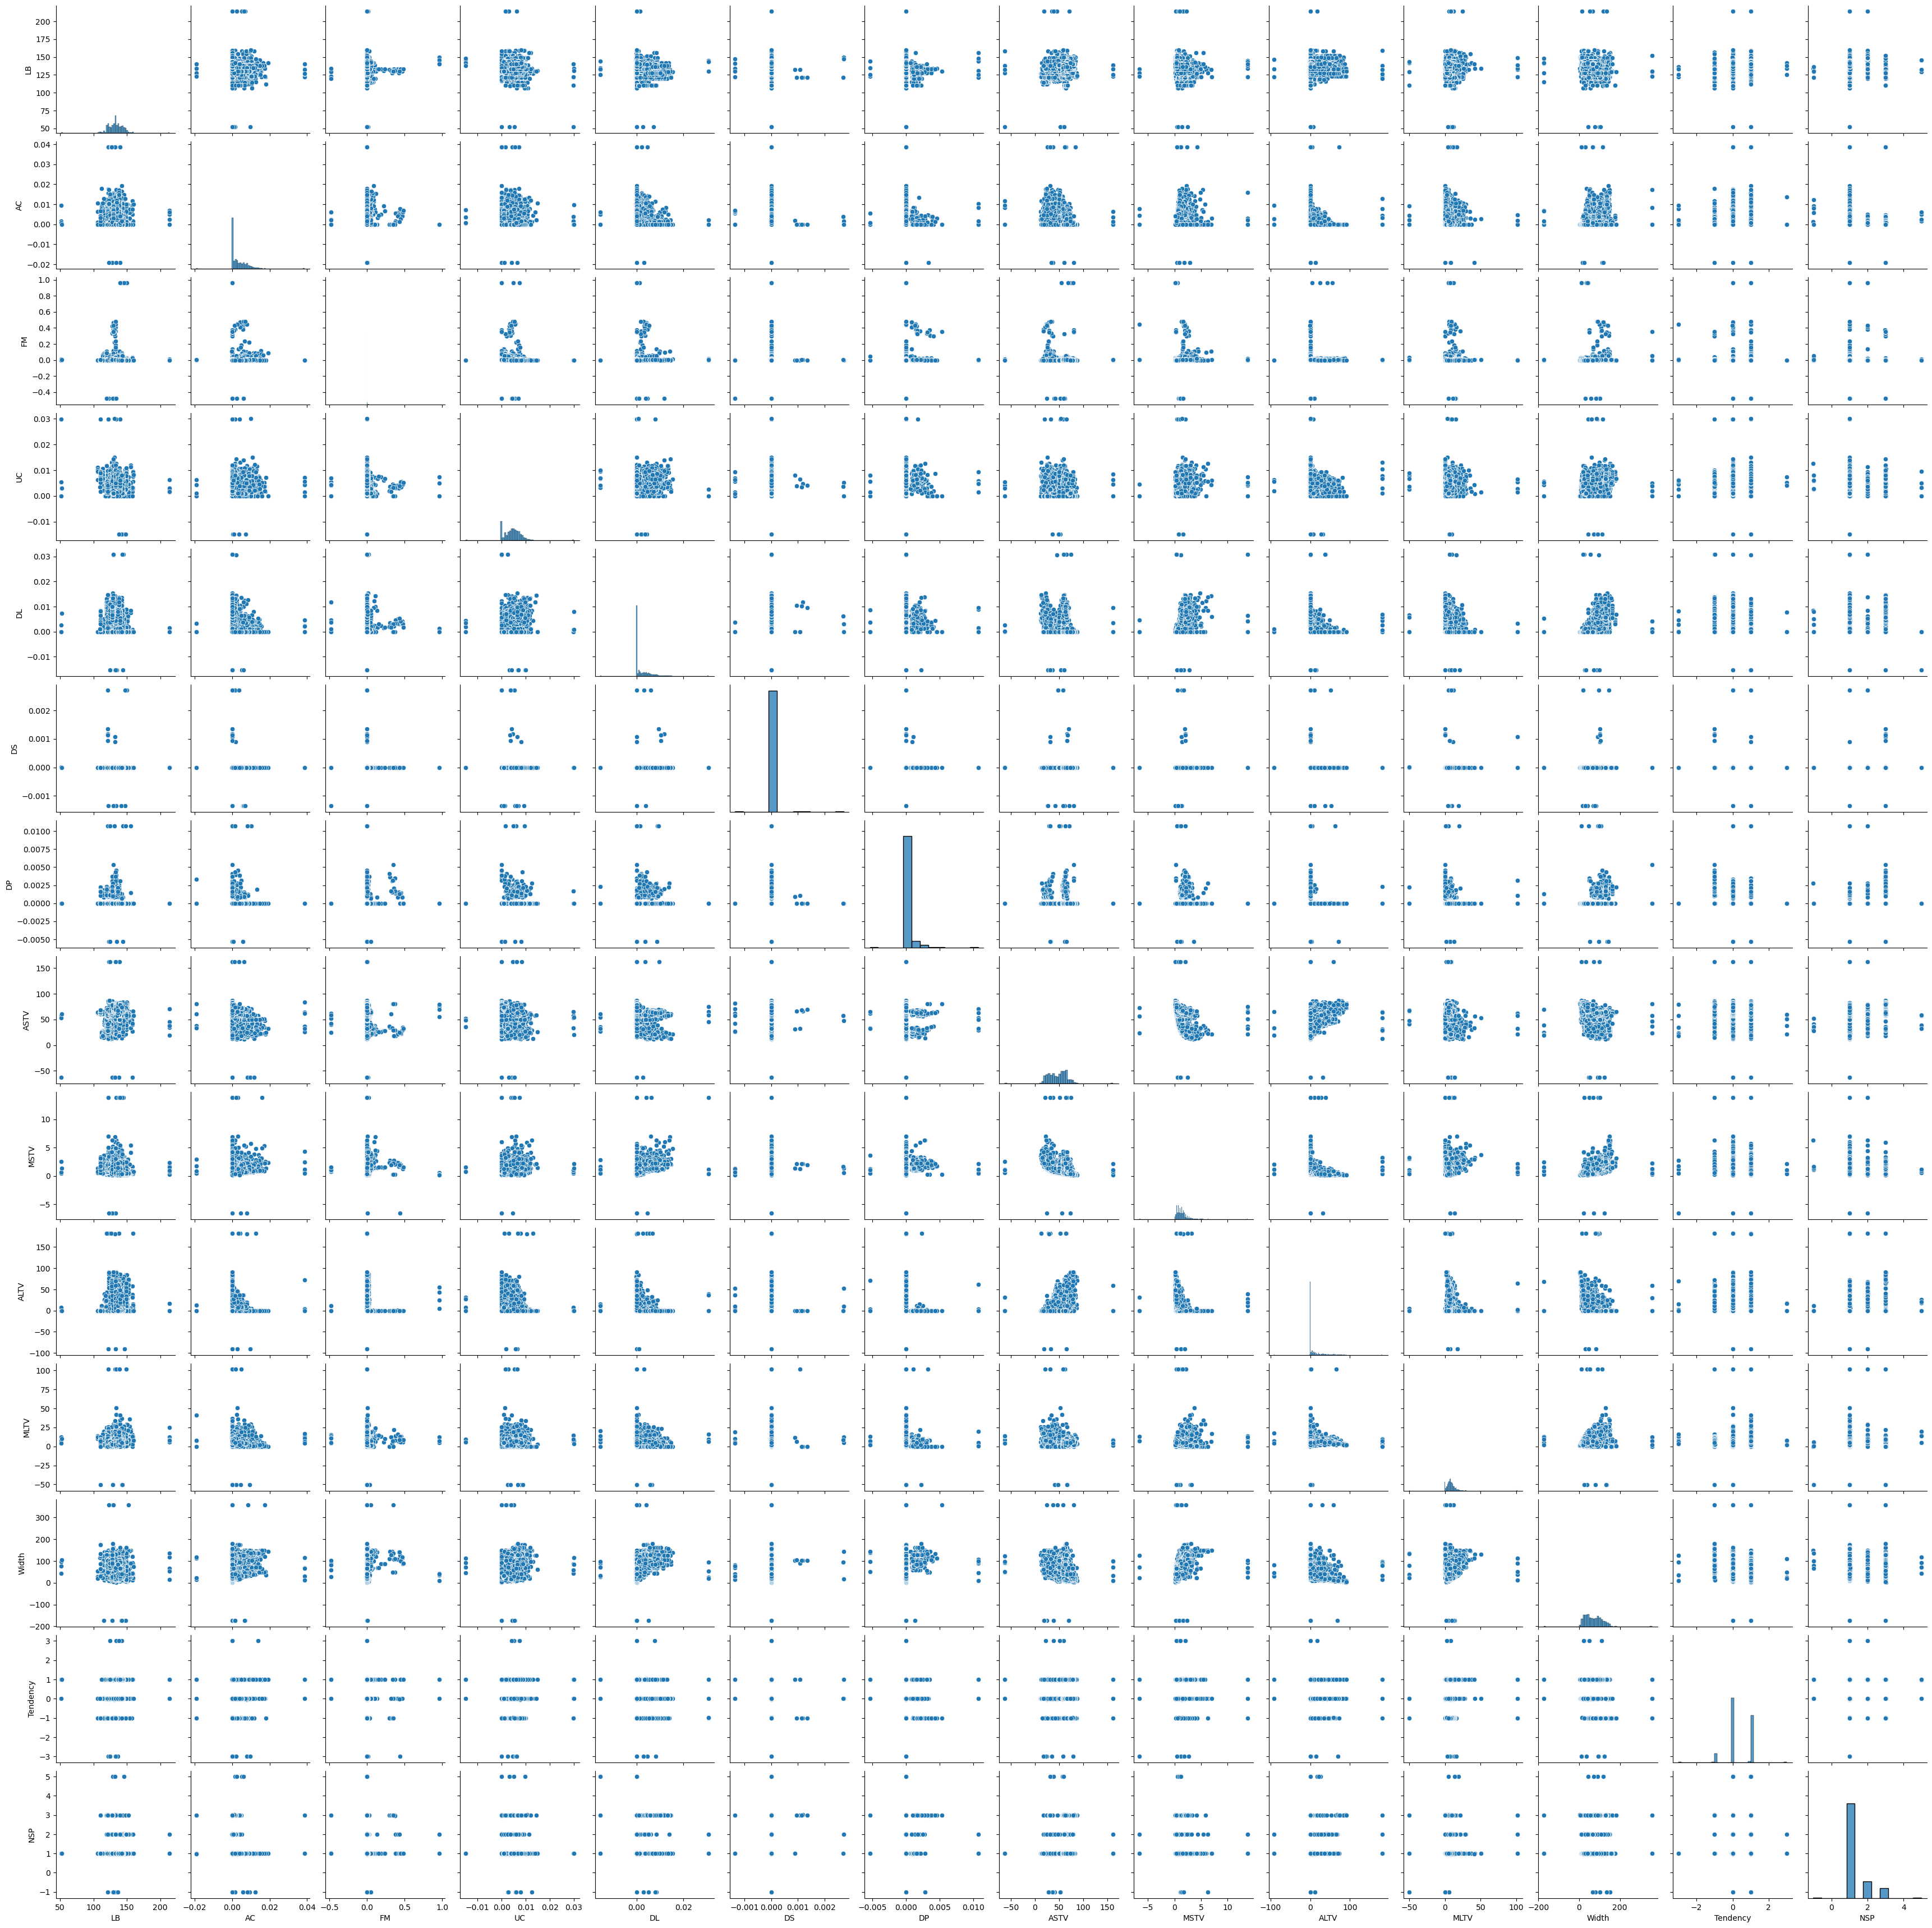

In [5]:
#Detect outliers if necessary.

import seaborn as sns
sns.pairplot(df)

In [6]:
#Treat outliers if necessary.

def remove_outliers(df):
    for col in df.select_dtypes(include=[float, int]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

#Remove outliers from the DataFrame

df_cleaned= remove_outliers(df)

#Verify the data after removing outliers

print(df_cleaned.describe())

               LB          AC          FM          UC          DL     DS  \
count  917.000000  917.000000  917.000000  917.000000  917.000000  917.0   
mean   132.198962    0.003866    0.000586    0.004902    0.001529    0.0   
std      9.315219    0.003710    0.001308    0.002679    0.002263    0.0   
min    106.000000   -0.000122   -0.002076   -0.000101   -0.000124    0.0   
25%    125.000000    0.000000    0.000000    0.003140    0.000000    0.0   
50%    133.000000    0.002985    0.000000    0.004988    0.000000    0.0   
75%    139.000000    0.006494    0.000168    0.006832    0.002762    0.0   
max    160.000000    0.013861    0.006272    0.012072    0.008454    0.0   

          DP        ASTV        MSTV        ALTV        MLTV       Width  \
count  917.0  917.000000  917.000000  917.000000  917.000000  917.000000   
mean     0.0   42.988288    1.221960    4.407001    8.420946   65.746068   
std      0.0   15.164262    0.502493    8.350133    4.325025   31.175068   
min      0.

In [7]:
#Drop Duplicates Vlue

df_cleaned.duplicated().sum()

2

In [9]:
df_cleaned.drop_duplicates()

LB        AC        FM        UC        DL   DS   DP  ASTV  MSTV  \
1     132.0  0.006380  0.000000  0.006380  0.003190  0.0  0.0  17.0   2.1   
2     133.0  0.003322  0.000000  0.008306  0.003322  0.0  0.0  16.0   2.1   
50    133.0  0.001634  0.000000  0.008086  0.000000  0.0  0.0  29.0   1.3   
58    148.0  0.000000  0.000000  0.005181  0.000000  0.0  0.0  41.0   0.8   
59    144.0  0.008143  0.000000  0.006595  0.000000  0.0  0.0  33.0   1.1   
...     ...       ...       ...       ...       ...  ...  ...   ...   ...   
2117  140.0  0.000000  0.000000  0.007812  0.000000  0.0  0.0  79.0   0.3   
2118  140.0  0.000000  0.000000  0.006470  0.000898  0.0  0.0  79.0   0.5   
2119  140.0  0.000000  0.000000  0.006764  0.001127  0.0  0.0  79.0   0.6   
2120  140.0  0.000000  0.000000  0.004975  0.001244  0.0  0.0  77.0   0.7   
2125  142.0  0.001616 -0.000188  0.008078  0.000000  0.0  0.0  74.0   0.4   

           ALTV  MLTV  Width  Tendency  NSP  
1      0.000000  10.4  130.0  0.000000  1.0  
2      0.000000  13.4  130.0  0.000000  1.0  
50     0.000000   7.4   67.0  0.000000  1.0  
58    29.000000   6.4   20.0  0.000000  1.0  
59    -0.060411   6.2  100.0  1.000000  1.0  
...         ...   ...    ...       ...  ...  
2117  20.000000   8.5   26.0  1.002932  1.0  
2118  26.428179   7.0   21.0  1.000000  1.0  
2119  27.000000   6.4   26.0  1.000000  1.0  
2120  17.000000   6.0   31.0  0.000000  1.0  
2125  35.857183   5.0   42.0  0.000000  1.0  

[915 rows x 14 columns]

2.Statistical Summary:

In [10]:
#Provide a statistical summary for each variable in the dataset, 
#including measures of central tendency (mean, median) and dispersion (standard deviation, interquartile range).

df_cleaned.describe()

LB          AC          FM          UC          DL     DS  \
count  917.000000  917.000000  917.000000  917.000000  917.000000  917.0   
mean   132.198962    0.003866    0.000586    0.004902    0.001529    0.0   
std      9.315219    0.003710    0.001308    0.002679    0.002263    0.0   
min    106.000000   -0.000122   -0.002076   -0.000101   -0.000124    0.0   
25%    125.000000    0.000000    0.000000    0.003140    0.000000    0.0   
50%    133.000000    0.002985    0.000000    0.004988    0.000000    0.0   
75%    139.000000    0.006494    0.000168    0.006832    0.002762    0.0   
max    160.000000    0.013861    0.006272    0.012072    0.008454    0.0   

          DP        ASTV        MSTV        ALTV        MLTV       Width  \
count  917.0  917.000000  917.000000  917.000000  917.000000  917.000000   
mean     0.0   42.988288    1.221960    4.407001    8.420946   65.746068   
std      0.0   15.164262    0.502493    8.350133    4.325025   31.175068   
min      0.0   15.000000    0.200000   -0.899870   -0.136053   12.000000   
25%      0.0   29.000000    0.800000    0.000000    5.607756   39.000000   
50%      0.0   42.000000    1.200000    0.000000    8.200000   60.000000   
75%      0.0   56.000000    1.500000    5.000000   11.000000   90.607055   
max      0.0   81.000000    2.700000   37.000000   19.600000  163.000000   

         Tendency    NSP  
count  917.000000  917.0  
mean     0.342449    1.0  
std      0.580383    0.0  
min     -1.006614    1.0  
25%      0.000000    1.0  
50%      0.000000    1.0  
75%      1.000000    1.0  
max      1.023635    1.0

3.Data Visualization:

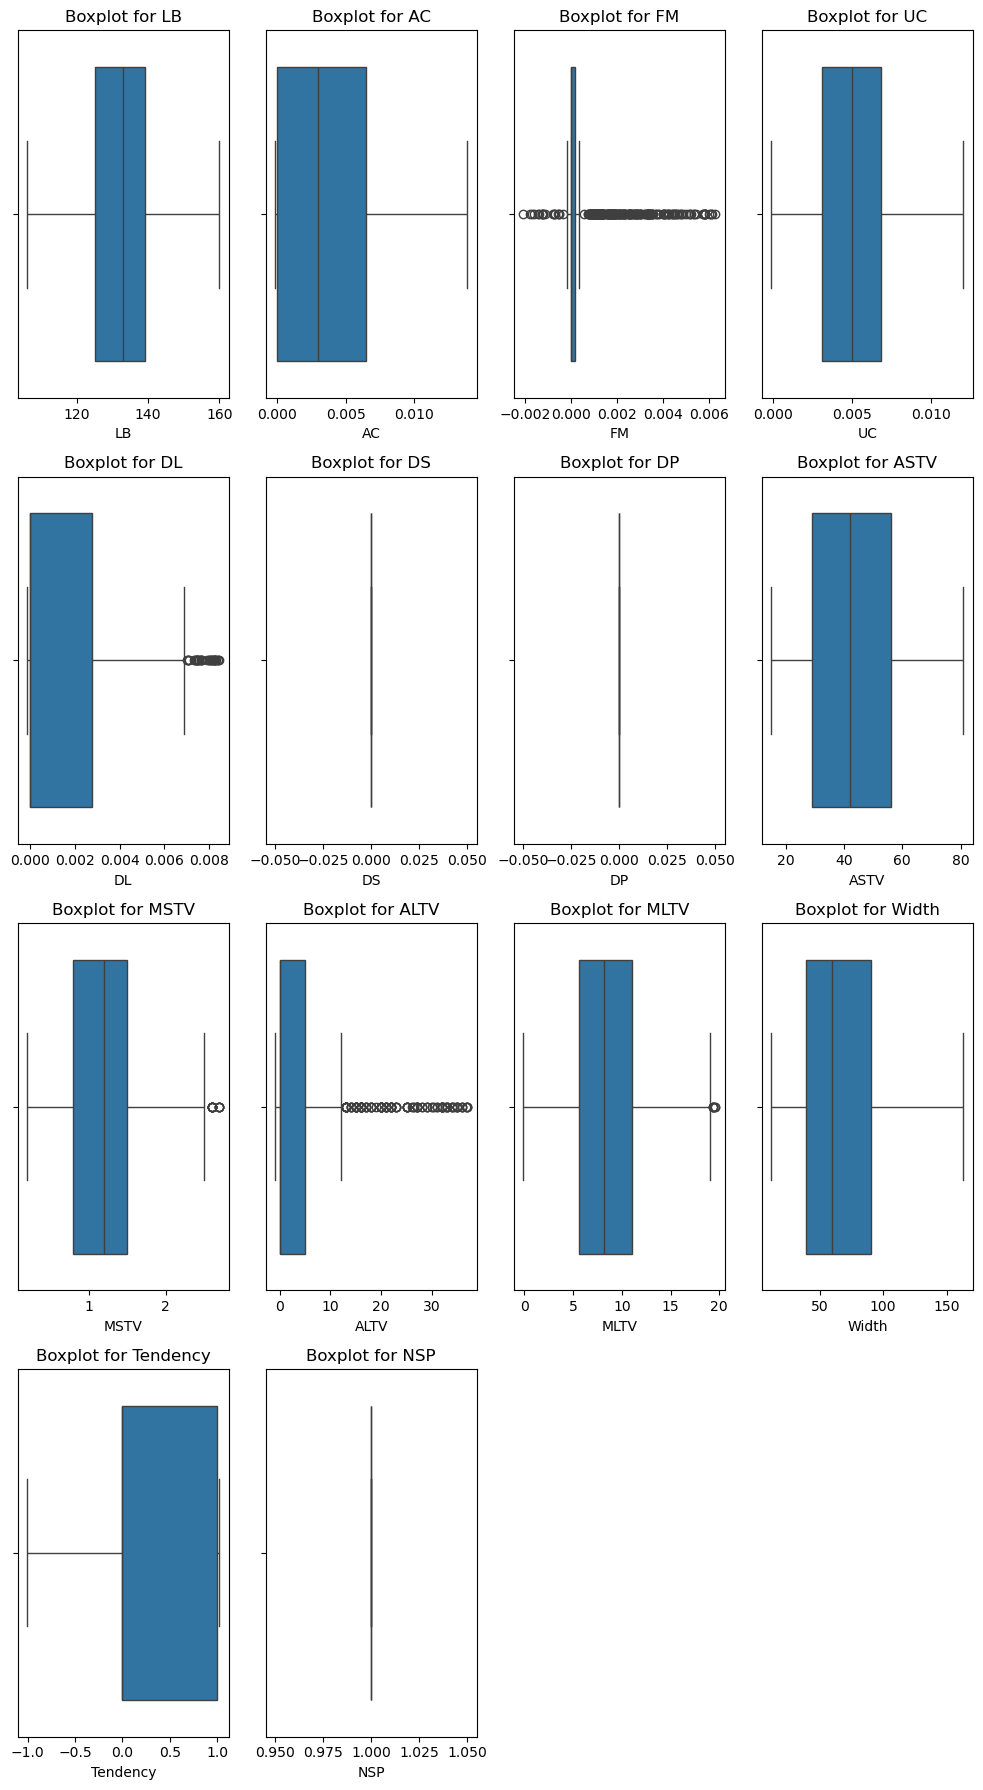

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure only numerical columns are selected

df_cleaned = df_cleaned.select_dtypes(include='number')

# Create subplots

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(10, 18))

# Flatten the array of axes for easy iteration

axs = axs.flatten()

# Plot boxplots for each column in the DataFrame

for i, column in enumerate(df_cleaned.columns):
    sns.boxplot(x=df_cleaned[column], ax=axs[i])  # Ensure x is used explicitly
    axs[i].set_title(f'Boxplot for {column}')
    
# Remove any unused subplots

for i in range(len(df_cleaned.columns), len(axs)):
    fig.delaxes(axs[i])
    
# Adjust layout and display the plots

plt.tight_layout()
plt.show()

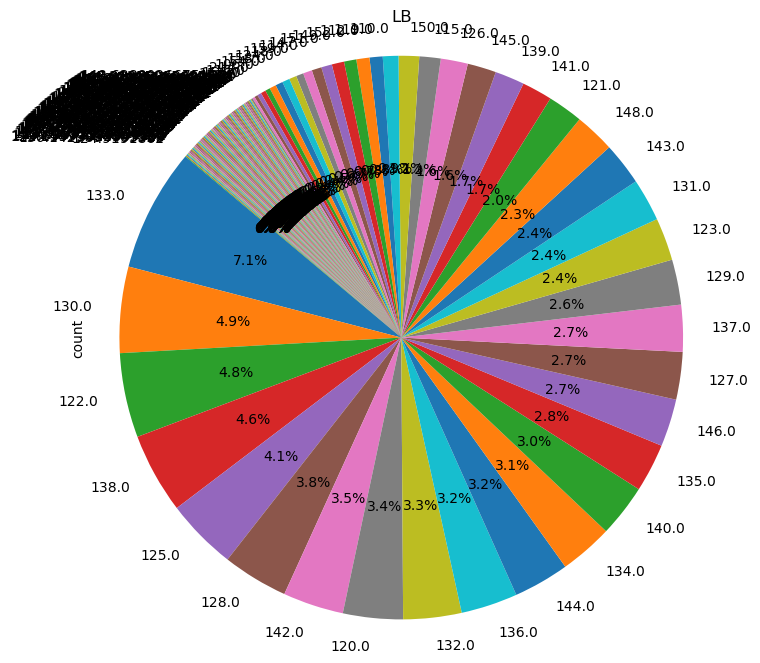

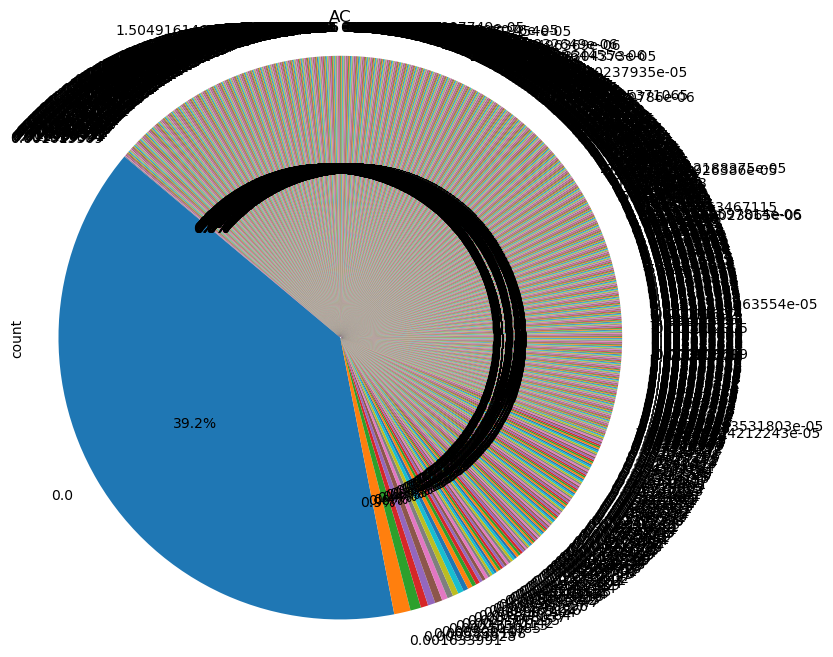

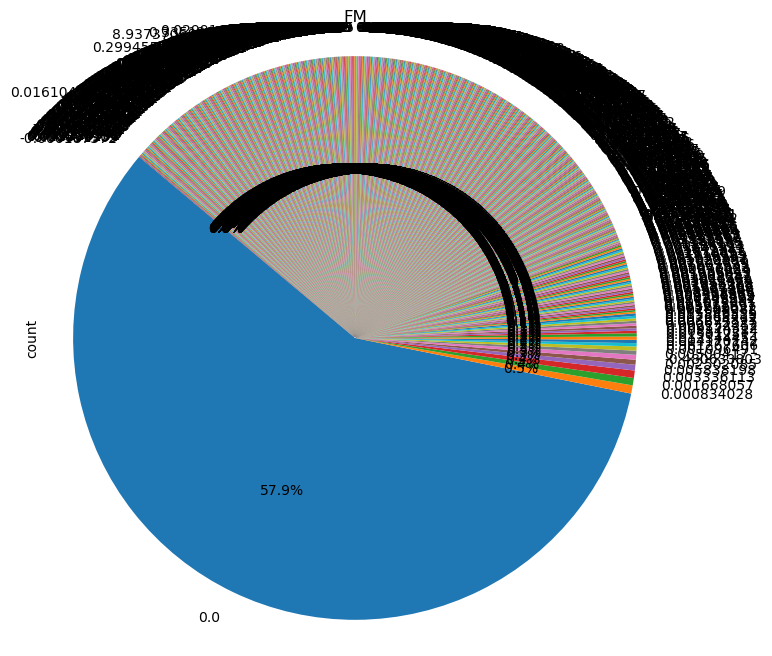

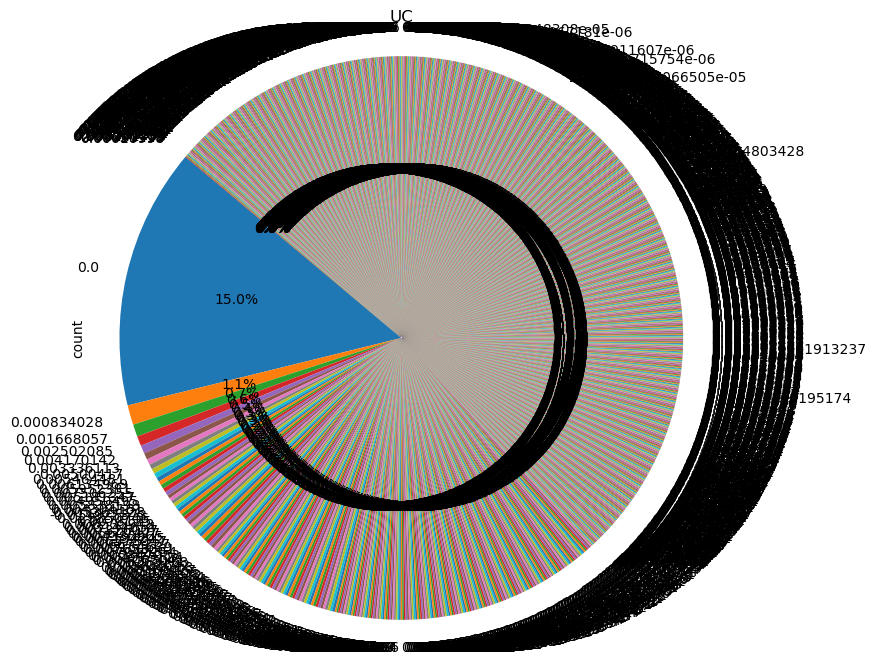

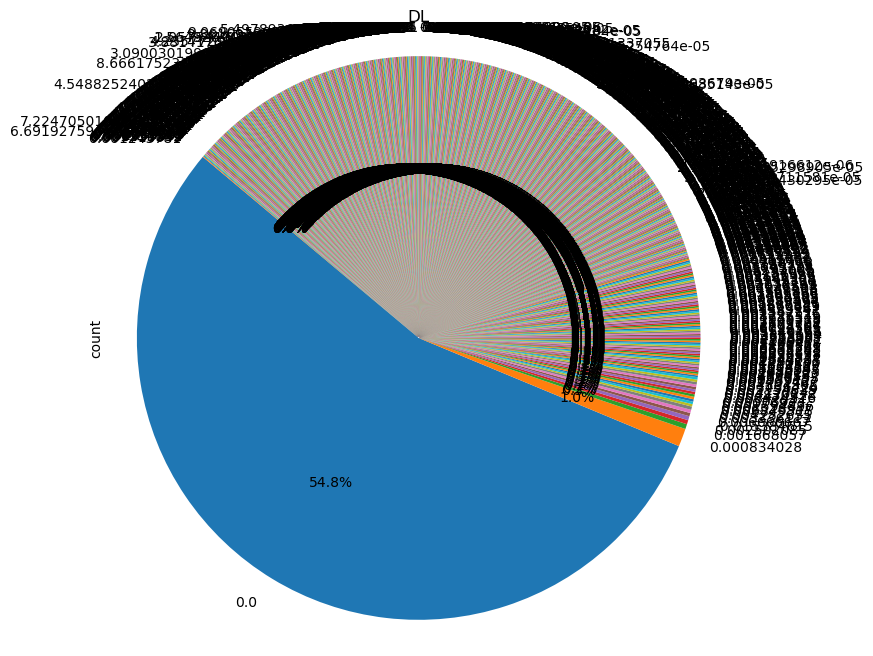

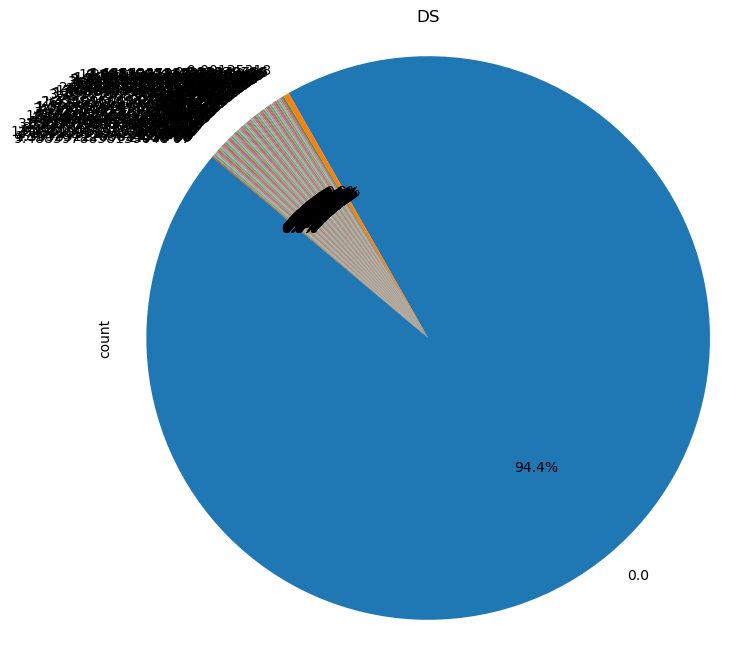

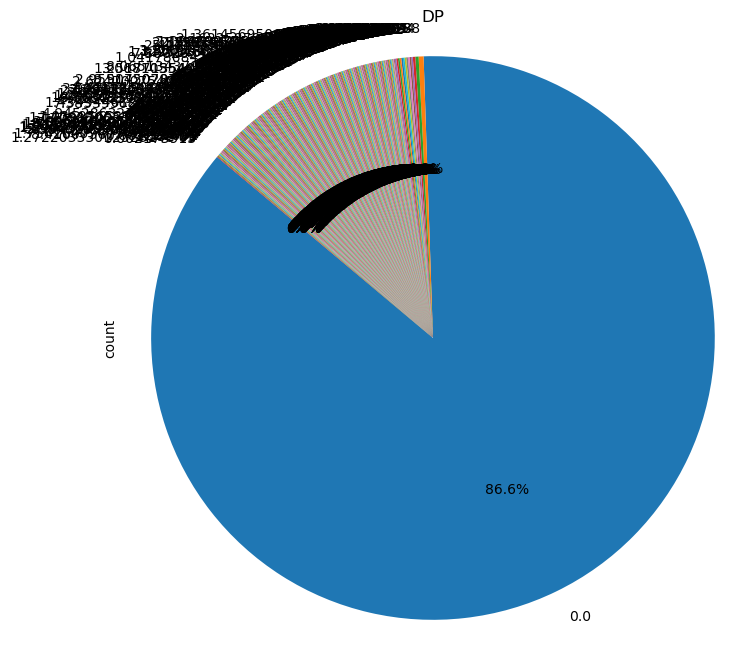

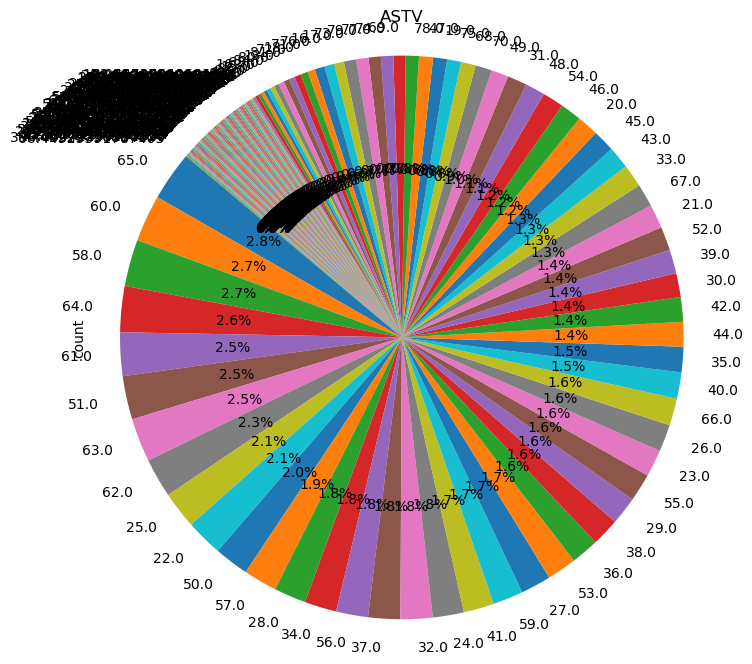

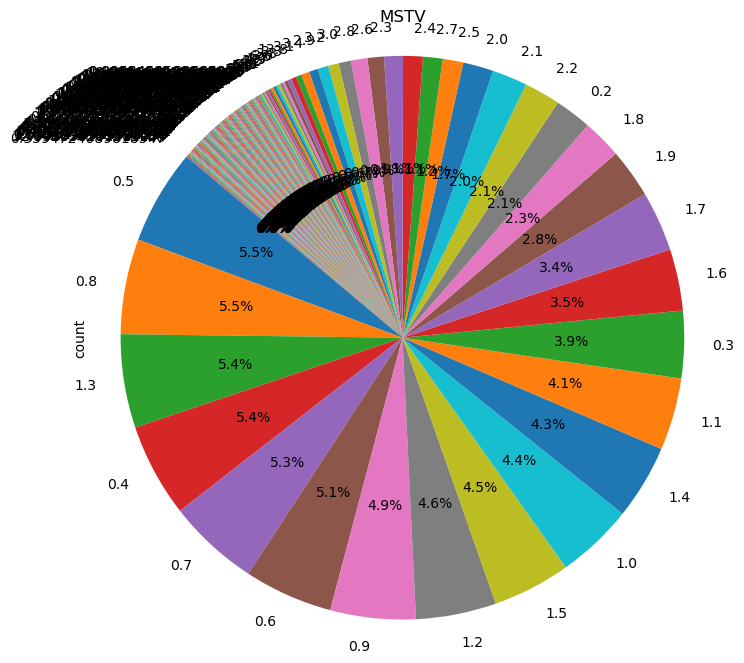

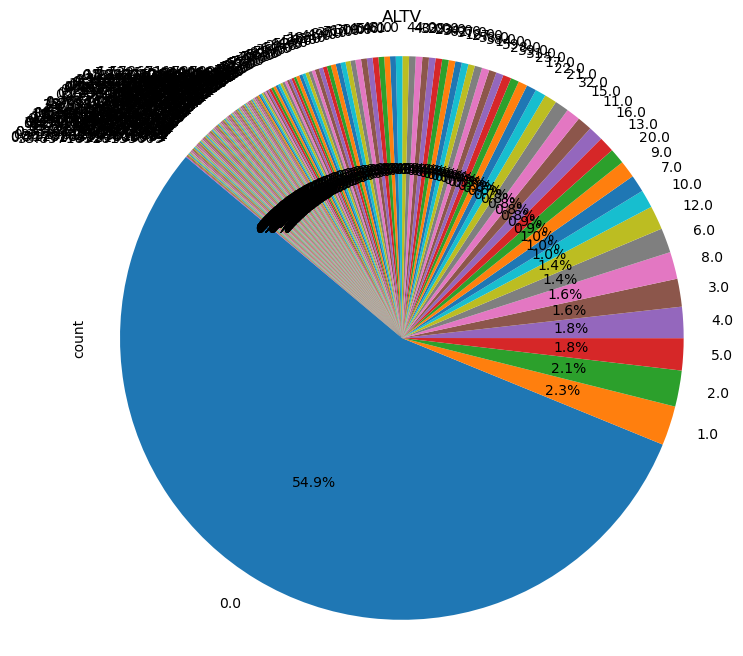

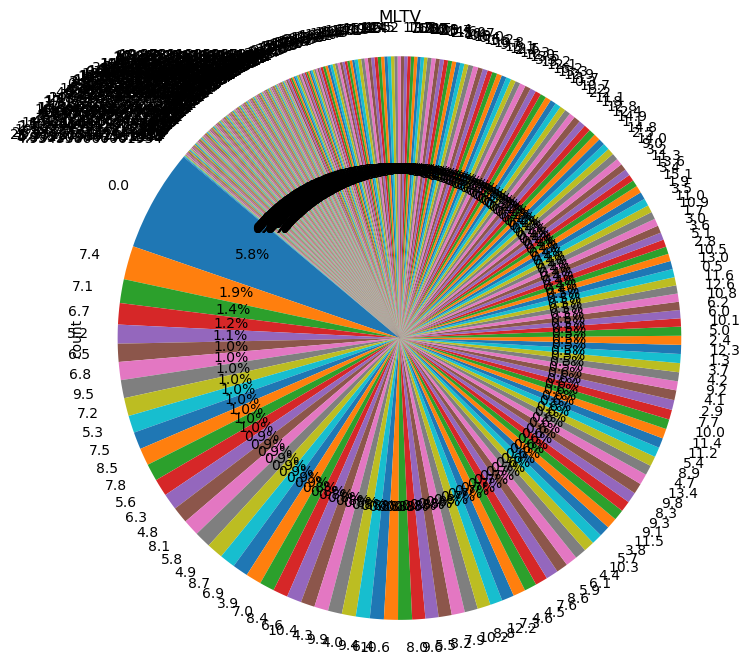

In [12]:
#Use bar charts or pie charts to display the frequency of categories for categorical variables.

categorical_columns = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV']
for col in categorical_columns:
    plt.figure(figsize=(8, 8))
    df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
    plt.title(col)
    plt.axis('equal')
    plt.show()

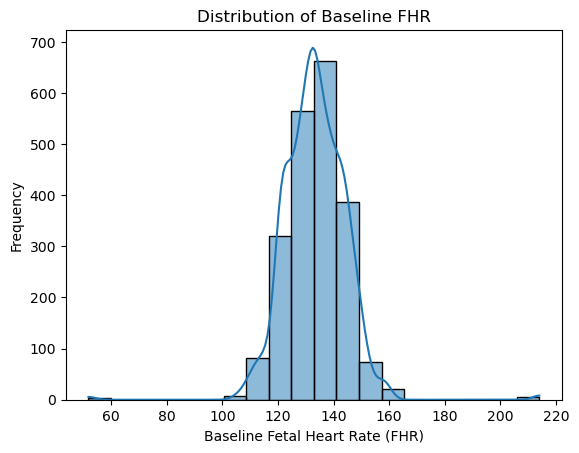

In [13]:
sns.histplot(df['LB'], bins=20, kde=True)
plt.xlabel('Baseline Fetal Heart Rate (FHR)')
plt.ylabel('Frequency')
plt.title('Distribution of Baseline FHR')
plt.show()

In [14]:
df.corr()

LB        AC        FM        UC        DL        DS  \
LB        1.000000 -0.062813  0.018807 -0.166229 -0.126563 -0.005432   
AC       -0.062813  1.000000  0.009768  0.071621 -0.093449 -0.033088   
FM        0.018807  0.009768  1.000000 -0.053226  0.009718  0.029916   
UC       -0.166229  0.071621 -0.053226  1.000000  0.190128 -0.006938   
DL       -0.126563 -0.093449  0.009718  0.190128  1.000000  0.058413   
DS       -0.005432 -0.033088  0.029916 -0.006938  0.058413  1.000000   
DP       -0.047650 -0.083298  0.121459  0.070295  0.144717  0.004321   
ASTV      0.241857 -0.230470 -0.032691 -0.181161 -0.069361  0.008426   
MSTV     -0.169647  0.132962  0.017055  0.189406  0.410102  0.016026   
ALTV      0.210542 -0.269807 -0.011936 -0.227304 -0.186967 -0.004335   
MLTV     -0.003423 -0.104853 -0.006121 -0.049452 -0.165293  0.034367   
Width    -0.118397  0.234549  0.097282  0.107083  0.408578  0.040845   
Tendency  0.236730  0.031710 -0.017819 -0.066832 -0.023914 -0.015294   
NSP       0.131839 -0.311689  0.074446 -0.185229  0.024879  0.065411   

                DP      ASTV      MSTV      ALTV      MLTV     Width  \
LB       -0.047650  0.241857 -0.169647  0.210542 -0.003423 -0.118397   
AC       -0.083298 -0.230470  0.132962 -0.269807 -0.104853  0.234549   
FM        0.121459 -0.032691  0.017055 -0.011936 -0.006121  0.097282   
UC        0.070295 -0.181161  0.189406 -0.227304 -0.049452  0.107083   
DL        0.144717 -0.069361  0.410102 -0.186967 -0.165293  0.408578   
DS        0.004321  0.008426  0.016026 -0.004335  0.034367  0.040845   
DP        1.000000  0.038119  0.118628 -0.076975 -0.113818  0.175462   
ASTV      0.038119  1.000000 -0.293882  0.357497 -0.219709 -0.206931   
MSTV      0.118628 -0.293882  1.000000 -0.291935  0.028452  0.432822   
ALTV     -0.076975  0.357497 -0.291935  1.000000 -0.107200 -0.345732   
MLTV     -0.113818 -0.219709  0.028452 -0.107200  1.000000  0.058664   
Width     0.175462 -0.206931  0.432822 -0.345732  0.058664  1.000000   
Tendency -0.129204 -0.010855 -0.038017  0.038234  0.116766  0.081643   
NSP       0.295057  0.420873 -0.095876  0.366454 -0.113011 -0.066974   

          Tendency       NSP  
LB        0.236730  0.131839  
AC        0.031710 -0.311689  
FM       -0.017819  0.074446  
UC       -0.066832 -0.185229  
DL       -0.023914  0.024879  
DS       -0.015294  0.065411  
DP       -0.129204  0.295057  
ASTV     -0.010855  0.420873  
MSTV     -0.038017 -0.095876  
ALTV      0.038234  0.366454  
MLTV      0.116766 -0.113011  
Width     0.081643 -0.066974  
Tendency  1.000000 -0.103713  
NSP      -0.103713  1.000000

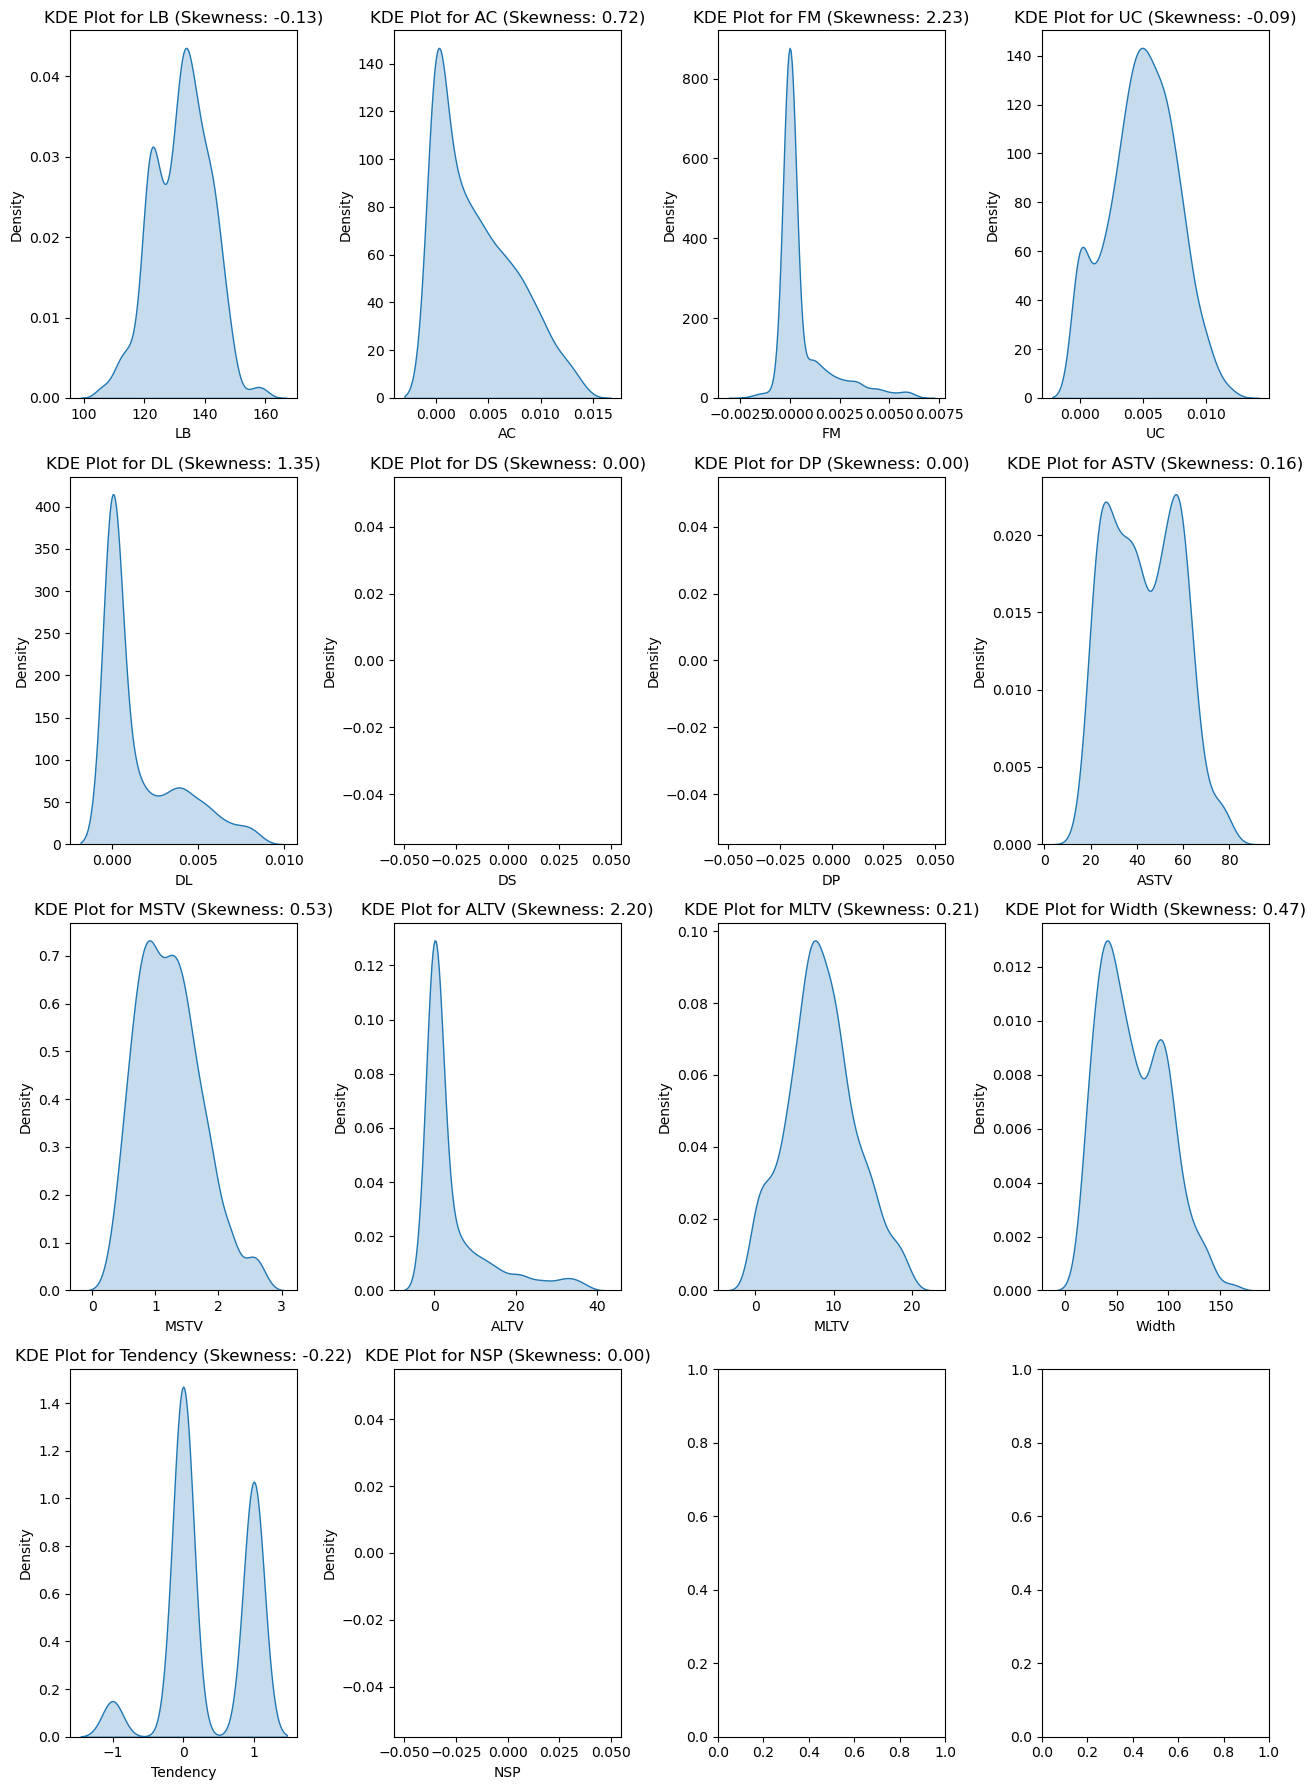

In [15]:
#Employ advanced visualization techniques like pair plots, or violin plots for deeper insights.

import warnings
warnings.filterwarnings('ignore')

# Create subplots

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(13, 18))
axes = axes.flatten()

# Iterate through numeric columns and plot their KDE plots

for i, column in enumerate(df_cleaned.columns):
    sns.kdeplot(df_cleaned[column], ax=axes[i], fill=True)
    skewness = df_cleaned[column].skew()
    axes[i].set_title(f'KDE Plot for {column} (Skewness: {skewness:.2f})')

plt.tight_layout()
plt.show()


4.Pattern Recognition and Insights:

In [16]:
#Identify any correlations between variables and discuss their potential implications.

df.corr()

LB        AC        FM        UC        DL        DS  \
LB        1.000000 -0.062813  0.018807 -0.166229 -0.126563 -0.005432   
AC       -0.062813  1.000000  0.009768  0.071621 -0.093449 -0.033088   
FM        0.018807  0.009768  1.000000 -0.053226  0.009718  0.029916   
UC       -0.166229  0.071621 -0.053226  1.000000  0.190128 -0.006938   
DL       -0.126563 -0.093449  0.009718  0.190128  1.000000  0.058413   
DS       -0.005432 -0.033088  0.029916 -0.006938  0.058413  1.000000   
DP       -0.047650 -0.083298  0.121459  0.070295  0.144717  0.004321   
ASTV      0.241857 -0.230470 -0.032691 -0.181161 -0.069361  0.008426   
MSTV     -0.169647  0.132962  0.017055  0.189406  0.410102  0.016026   
ALTV      0.210542 -0.269807 -0.011936 -0.227304 -0.186967 -0.004335   
MLTV     -0.003423 -0.104853 -0.006121 -0.049452 -0.165293  0.034367   
Width    -0.118397  0.234549  0.097282  0.107083  0.408578  0.040845   
Tendency  0.236730  0.031710 -0.017819 -0.066832 -0.023914 -0.015294   
NSP       0.131839 -0.311689  0.074446 -0.185229  0.024879  0.065411   

                DP      ASTV      MSTV      ALTV      MLTV     Width  \
LB       -0.047650  0.241857 -0.169647  0.210542 -0.003423 -0.118397   
AC       -0.083298 -0.230470  0.132962 -0.269807 -0.104853  0.234549   
FM        0.121459 -0.032691  0.017055 -0.011936 -0.006121  0.097282   
UC        0.070295 -0.181161  0.189406 -0.227304 -0.049452  0.107083   
DL        0.144717 -0.069361  0.410102 -0.186967 -0.165293  0.408578   
DS        0.004321  0.008426  0.016026 -0.004335  0.034367  0.040845   
DP        1.000000  0.038119  0.118628 -0.076975 -0.113818  0.175462   
ASTV      0.038119  1.000000 -0.293882  0.357497 -0.219709 -0.206931   
MSTV      0.118628 -0.293882  1.000000 -0.291935  0.028452  0.432822   
ALTV     -0.076975  0.357497 -0.291935  1.000000 -0.107200 -0.345732   
MLTV     -0.113818 -0.219709  0.028452 -0.107200  1.000000  0.058664   
Width     0.175462 -0.206931  0.432822 -0.345732  0.058664  1.000000   
Tendency -0.129204 -0.010855 -0.038017  0.038234  0.116766  0.081643   
NSP       0.295057  0.420873 -0.095876  0.366454 -0.113011 -0.066974   

          Tendency       NSP  
LB        0.236730  0.131839  
AC        0.031710 -0.311689  
FM       -0.017819  0.074446  
UC       -0.066832 -0.185229  
DL       -0.023914  0.024879  
DS       -0.015294  0.065411  
DP       -0.129204  0.295057  
ASTV     -0.010855  0.420873  
MSTV     -0.038017 -0.095876  
ALTV      0.038234  0.366454  
MLTV      0.116766 -0.113011  
Width     0.081643 -0.066974  
Tendency  1.000000 -0.103713  
NSP      -0.103713  1.000000

5.Conclusion:

In [ ]:
Based on the correlation heatmap:

LB (Baseline Fetal Heart Rate) shows a strong negative correlation with AC (Accelerations)
and FM (Fetal Movements), which might suggest that higher baseline heart rates are
associated with fewer accelerations and movements.
    
AC (Accelerations) has a positive correlation with FM (Fetal Movements), indicating that 
increased fetal movements are associated with more accelerations in heart rate.

UC (Uterine Contractions) shows a positive correlation with DL (Decelerations Late) and
DP (Decelerations Prolonged), suggesting that increased contractions may lead to more 
instances of late and prolonged decelerations.

There's a negative correlation between ASTV (Percentage of Time with Abnormal Short Term
Variability) and MLTV (Mean Value of Long Term Variability), implying that as short term 
variability increases, long term variability tends to decrease, and vice versa.
    
These findings could impact decision-making in prenatal care and labor management. For example:

Monitoring fetal movements and accelerations could be crucial indicators of fetal 
well-being.

The relationship between uterine contractions and decelerations could inform decisions 
regarding labor induction or cesarean section.
    
Understanding variability in fetal heart rate over different time scales
(short-term vs. long-term) could aid in identifying potential risks during pregnancy.
    
If temporal data is available, trends or patterns over time can be analyzed to further
understand how these variables change throughout the course of pregnancy and labor.